In [1]:
import tensorflow as tf
import os
import numpy as np
import matplotlib.pyplot as plt
import pickle
import pandas as pd

%matplotlib inline

cwd = os.getcwd()

In [2]:
datapath = os.path.join(cwd, "..", "data")

In [3]:
from os import listdir
from os.path import isfile, join

img_rows, img_cols = 28, 28

data_dir = os.path.join(cwd, "..", "data")
model_dir = os.path.join(cwd, "..", "model")

file_list = [f for f in listdir(datapath) if isfile(join(datapath, f))]

file_list_df = pd.DataFrame(file_list, columns = [ "Filename"] )

cleaned_file_list_df = file_list_df[(file_list_df.Filename != '.gitkeep') & \
                                    (file_list_df.Filename != 'test.pickle') & \
                                    (file_list_df.Filename != 'train.pickle')]

LABELS = []
for index, row in file_list_df.iterrows():
    if row["Filename"] != '.gitkeep' and row["Filename"] != 'test.pickle' and row["Filename"] != 'train.pickle':
        name_label = os.path.splitext(row["Filename"])[0]
        labl = name_label.split('_')[3]
        LABELS.append(labl) 

LABELS = np.array(LABELS)

#LABELS = np.array(
#    map(
#        (lambda x : x.replace(".npy", "")),
#        filter(lambda x: x.endswith('.npy'), os.listdir(data_dir))
#    )
#)

num_classes = len(LABELS)
len(LABELS)

datas_path = cleaned_file_list_df.to_numpy()

datas_path

array([['full_numpy_bitmap_bowtie.npy'],
       ['full_numpy_bitmap_butterfly.npy'],
       ['full_numpy_bitmap_cake.npy'],
       ['full_numpy_bitmap_cat.npy'],
       ['full_numpy_bitmap_dog.npy'],
       ['full_numpy_bitmap_dolphin.npy'],
       ['full_numpy_bitmap_dumbbell.npy'],
       ['full_numpy_bitmap_elephant.npy'],
       ['full_numpy_bitmap_fish.npy'],
       ['full_numpy_bitmap_helicopter.npy'],
       ['full_numpy_bitmap_leaf.npy'],
       ['full_numpy_bitmap_mountain.npy'],
       ['full_numpy_bitmap_octagon.npy'],
       ['full_numpy_bitmap_panda.npy'],
       ['full_numpy_bitmap_rainbow.npy']], dtype=object)

In [4]:
LABELS

array(['bowtie', 'butterfly', 'cake', 'cat', 'dog', 'dolphin', 'dumbbell',
       'elephant', 'fish', 'helicopter', 'leaf', 'mountain', 'octagon',
       'panda', 'rainbow'], dtype='<U10')

In [6]:
def data_prepare():
    datas_path = filter(lambda x: x.endswith('.npy'), os.listdir(data_dir))
    print(datas_path)
    dataset = np.array([]).reshape(0, img_rows * img_cols + 1)
    
    for i, d_path in enumerate(datas_path):
        data = np.load(os.path.join(data_dir, d_path))
        image_size = len(data)
        label = np.ones(image_size, dtype=int) * i
        data = np.concatenate((label[:, np.newaxis], data), axis=1)
        
        np.random.shuffle(data)

        dataset = np.append(dataset, data[0:5000], axis=0)
        print("Load {}".format(d_path))
    
    np.random.shuffle(dataset)
    dataset_len = len(dataset)
    split_x = (int)(dataset_len * 0.9)
    
    print("Dataset {} images".format(dataset_len))
    print("Train {} images".format(split_x))
    print("Test {} images".format(dataset_len - split_x))
    
    print("Write data to pickle files...")
    
    pickle.dump(dataset[0:split_x], open(os.path.join(data_dir, "train.pickle"), "wb"))
    pickle.dump(dataset[split_x:-1], open(os.path.join(data_dir, "test.pickle"), "wb"))
    
    print("Finish")

if not os.path.exists(os.path.join(data_dir, "train.pickle")):
    print("Prepare pickle data")
    data_prepare()

Load full_numpy_bitmap_bowtie.npy
Load full_numpy_bitmap_butterfly.npy
Load full_numpy_bitmap_cake.npy
Load full_numpy_bitmap_cat.npy
Load full_numpy_bitmap_dog.npy
Load full_numpy_bitmap_dolphin.npy
Load full_numpy_bitmap_dumbbell.npy
Load full_numpy_bitmap_elephant.npy
Load full_numpy_bitmap_fish.npy
Load full_numpy_bitmap_helicopter.npy
Load full_numpy_bitmap_leaf.npy
Load full_numpy_bitmap_mountain.npy
Load full_numpy_bitmap_octagon.npy
Load full_numpy_bitmap_panda.npy
Load full_numpy_bitmap_rainbow.npy
Dataset 75000 images
Train 67500 images
Test 7500 images
Write data to pickle files...
Finish


In [8]:
x_train = None
y_train = None
x_test = None
y_test = None

def load_dataset():
    global x_train, y_train, x_test, y_test
    train_data = pickle.load(open(os.path.join(data_dir, "train.pickle"), "rb"))
    test_data = pickle.load(open(os.path.join(data_dir, "test.pickle"), "rb"))
    x_train = train_data[:,1:]
    y_train = train_data[:,0]
    x_test = test_data[:,1:]
    y_test = test_data[:,0]
    print("Load dataset complete")

load_dataset()

Load dataset complete


In [41]:
#LABELS = [ 'stethoscope', 'flower', 'dog', 'key', 'dolphin', 'butterfly', 'cake', 'lollipop', 'key board', 'tree', 'fish', 'ant', 
#         'violin', 'fish', 'cat']

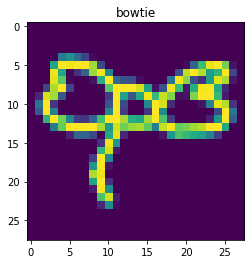

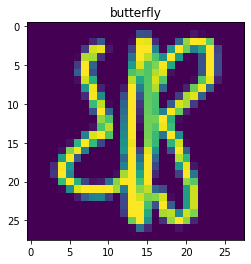

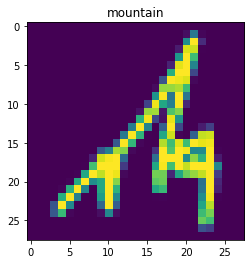

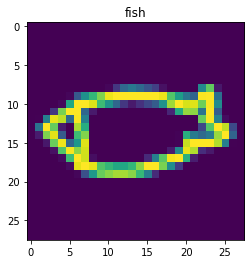

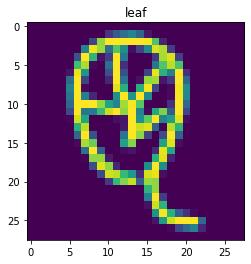

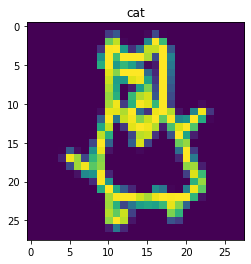

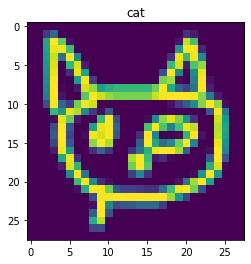

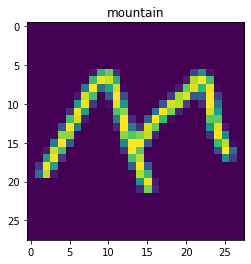

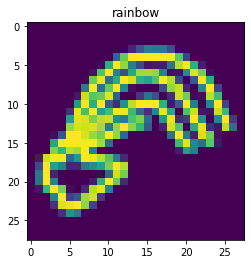

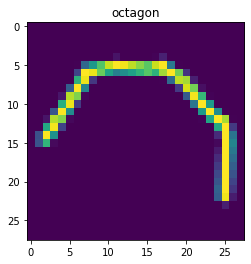

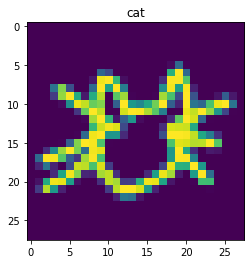

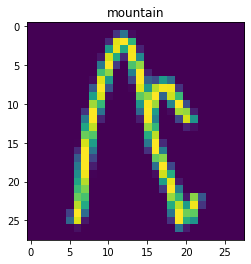

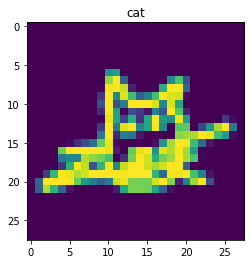

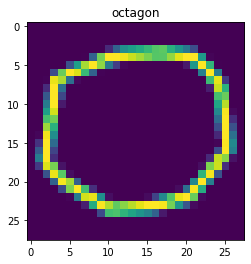

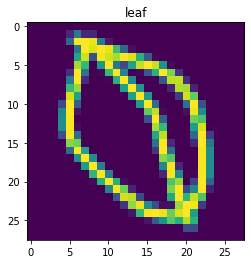

In [19]:
for i in range(num_classes):
    plt.imshow(x_train[i].reshape(28,28))
    plt.title(LABELS[(int)(y_train[i])])
    # Save the figure
    file_name = '../docs/' + LABELS[(int)(y_train[i])] + '_train_img_data.png'
    plt.savefig(file_name)
    plt.show()


### Data Prepossing

In [11]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

In [12]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

y_train_onehot = keras.utils.to_categorical(y_train, num_classes)
y_test_onehot = keras.utils.to_categorical(y_test, num_classes)

print(x_train.shape)
print(y_train_onehot.shape)
print(x_test.shape)
print(y_test_onehot.shape)

(67500, 28, 28, 1)
(67500, 15)
(7499, 28, 28, 1)
(7499, 15)


### Define Callback

In [23]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.975):
      print("\nReached 97.5% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

### Model

In [24]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(img_rows, img_cols, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(
    loss=keras.losses.categorical_crossentropy,
    optimizer=keras.optimizers.Adam(),
    metrics=['accuracy']
)

model.fit(
    x_train, y_train_onehot,
    batch_size = 32,
    epochs = 30,
    callbacks=[callbacks],
    verbose = 1
)

model.save(os.path.join(model_dir, 'model.h5'))

Epoch 1/30
67500/67500 [==============================] - 81s 1ms/step - loss: 0.7949 - accuracy: 0.7625
Epoch 2/30
67500/67500 [==============================] - 74s 1ms/step - loss: 0.4920 - accuracy: 0.8544
Epoch 3/30
67500/67500 [==============================] - 71s 1ms/step - loss: 0.4038 - accuracy: 0.8787
Epoch 4/30
67500/67500 [==============================] - 76s 1ms/step - loss: 0.3543 - accuracy: 0.8928
Epoch 5/30
67500/67500 [==============================] - 81s 1ms/step - loss: 0.3119 - accuracy: 0.9039
Epoch 6/30
67500/67500 [==============================] - 78s 1ms/step - loss: 0.2747 - accuracy: 0.9145
Epoch 7/30
67500/67500 [==============================] - 78s 1ms/step - loss: 0.2430 - accuracy: 0.9228
Epoch 8/30
67500/67500 [==============================] - 77s 1ms/step - loss: 0.2190 - accuracy: 0.9298
Epoch 9/30
67500/67500 [==============================] - 72s 1ms/step - loss: 0.2004 - accuracy: 0.9356
Epoch 10/30
67500/67500 [==============================

In [25]:
model = keras.models.load_model(os.path.join(model_dir, 'model.h5'))

score = model.evaluate(x_test, y_test_onehot, verbose = 1)
print("\nAccuracy {}".format(score[1]))

7499/7499 [==============================] - 1s 199us/step

Accuracy 0.8851847052574158


In [26]:
from sklearn.metrics import confusion_matrix

y_pred = np.argmax(model.predict(x_test, verbose=1), axis=1)
confusion_matrix = confusion_matrix(y_test.astype(int), y_pred)

print()
print(confusion_matrix)


7499/7499 [==============================] - 1s 172us/step

[[476   9   1   0   3   4   5   6   7   2   4   1   5   1   2]
 [  8 463   0   1   1   0   2   3   0   2   1   0   3   0   0]
 [  2   0 462   2   2   4   8   0   1   4   4   1   3   2   1]
 [  0   2   2 434  42   6   1  10   5   7   0   0   4  10   0]
 [  2   0   1  39 350   8   9  65   5   4   3   0   2  11   4]
 [  2   4   2   3   7 421   8   8  14   9   7   2   3   3   8]
 [  7   3   0   5  11   4 436  11   3   6   7   0   4   4   0]
 [  0   6   1  10  34   4   3 407   4   5   1   0   1   8   1]
 [  8   1   0   4   3  22   4   2 438   6   2   1   4   1   0]
 [  2   9   1   7   2   6   0   3   3 469   0   0   4   0   0]
 [  2   3   1   5   3   7   6   3   4   2 451   1   5   2   0]
 [  0   1   1   2   3   4   6   3   0   3   3 480   1   0   5]
 [  0   0   0   5   0   3   4   4   2   2   4   2 454   0   2]
 [  2   8   2   9  14   2  10   7   1   5   4   0   3 424   0]
 [  0   0   0   1   1   8   2   2   1   0   2   5   1   2 

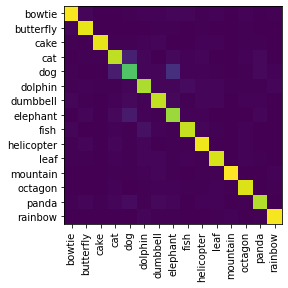

In [27]:

plt.imshow(confusion_matrix, interpolation='nearest')
plt.xticks(np.arange(0,num_classes), LABELS, rotation=90)
plt.yticks(np.arange(0,num_classes), LABELS)

plt.show()

In [28]:
# Calculate classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred,
                            target_names=['bowtie', 'butterfly', 'cake', 'cat', 'dog', 'dolphin', 'dumbbell',
       'elephant', 'fish', 'helicopter', 'leaf', 'mountain', 'octagon',
       'panda', 'rainbow']))

              precision    recall  f1-score   support

      bowtie       0.93      0.90      0.92       526
   butterfly       0.91      0.96      0.93       484
        cake       0.97      0.93      0.95       496
         cat       0.82      0.83      0.83       523
         dog       0.74      0.70      0.72       503
     dolphin       0.84      0.84      0.84       501
    dumbbell       0.87      0.87      0.87       501
    elephant       0.76      0.84      0.80       485
        fish       0.90      0.88      0.89       496
  helicopter       0.89      0.93      0.91       506
        leaf       0.91      0.91      0.91       495
    mountain       0.97      0.94      0.96       512
     octagon       0.91      0.94      0.93       482
       panda       0.91      0.86      0.88       491
     rainbow       0.95      0.95      0.95       498

    accuracy                           0.89      7499
   macro avg       0.89      0.89      0.89      7499
weighted avg       0.89   